# **Hands-on Assignment 7: Statistical Programming in Python**

##**Introduction**
Fluency in statistical programming is strong asset to any researcher's skill repetoire as it enables one to quickly produce custom calculations and plots regardless of the size of one's data.

Here you will gain experience with staistical programming by producing a function that will quickly calculate joint and marginal probabilities from a count matrix obtained from real-world medical data.

The data you will be using a dataset published by The National Heart, Lung and Blood Institute (NHLBI) from a clinical trial known as the Digitalis Investigation Group (DIG) Trial. This data contains baseline and outcome information for chronic heart failure patients from the DIG Trial cohort who received either the drug Digoxin or a placebo. Here, outcomes have been recorded under two main categories, cardiovasular mortality and hospitalization.

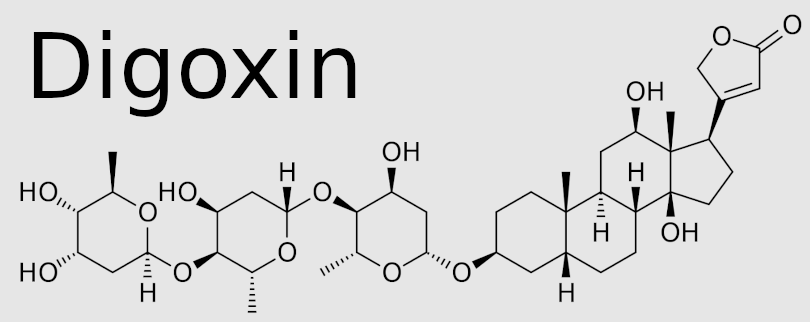

For more information, you may refer to a comprehensive description of this dataset here:

https://biolincc.nhlbi.nih.gov/media/teachingstudies/digdoc.pdf?link_time=2022-09-20_07:24:09.208947

##**Instructions**

In your own Colab notebook, use the concepts presented in the previous sections to write a function that creates a probability matrix from a count matrix produced by `pd.crosstab` with `margins=True`. Then, calculate the requested conditional probability. You will be graded based on the functionality of your function, the output it produces when provided the cleaned DIG data, and your calculated conditional probability.

##**Steps**

To start, import this `.csv` file generated from the Pandas DataFrame in the previous assignment. Here is the direct link to this dataset:

https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP

In [5]:
%%bash
rm -r /content/sample_data

In [6]:
import pandas as pd
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP')

In [7]:
df

,AGE,RACE,SEX,EJF_PER,CREAT,KLEVEL,CHFDUR,CHFETIOL,PREVMI,DIABETES,HYPERTEN,DIGDOSE,CVD,WHF,DIG,HOSP,NHOSP,DEATH,REASON,DIABETES_AND_HYPERTEN
0,77,1,1,12,1.500,3.1,2.0,4.0,1.0,0,1.0,0.25,1,1,0,1,4,1,1.0,0
1,72,1,2,36,1.239,5.1,12.0,1.0,0.0,0,1.0,0.25,1,1,0,1,2,0,Not given,0
2,74,1,1,15,1.466,4.0,288.0,4.0,0.0,0,0.0,0.375,1,1,0,1,5,0,Not given,0
3,69,2,2,45,1.200,4.3,84.0,4.0,1.0,0,0.0,0.25,1,0,0,1,5,0,Not given,0
4,64,1,2,30,1.300,4.3,31.0,1.0,1.0,0,0.0,0.25,0,0,0,0,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,64,1,1,16,1.159,4.2,48.0,1.0,1.0,0,0.0,0.25,1,1,0,1,1,0,Not given,0
5981,62,1,1,20,1.398,4.9,2.0,4.0,1.0,0,0.0,0.25,1,1,0,1,2,1,4.0,0
5982,39,1,1,15,1.500,4.0,3.0,2.0,0.0,0,1.0,0.25,0,0,0,0,0,0,Not given,0
5983,56,1,1,29,1.273,4.3,11.0,1.0,1.0,0,1.0,0.25,1,1,0,1,6,1,1.0,0


Next, suppose we are curious whether patients with both a history of both Diabetes and Hypertension (`DIABETES_AND_HYPERTEN`) are likely to have been hospitalized due to cardiovascular disease (`CVD`).  

To investigate this, use the Pandas function `pd.crosstab()` to generate a matrix of counts for the `DIABETES_AND_HYPERTEN` and `CVD` columns. `pd.crosstab()` should be provided three arguments: a DataFrame column, another DataFrame column, and `margins=True`.


In [8]:
df_matrix_of_count=pd.crosstab(df['DIABETES_AND_HYPERTEN'], df['CVD'], margins=True)
df_matrix_of_count

CVD,0,1,All
DIABETES_AND_HYPERTEN,,,
0,2487,2715,5202
1,380,403,783
All,2867,3118,5985


Upon succesful completion, you should produce a table like follows that is filled with numerical counts. Like the `DIABETES_AND_HYPERTEN` and `CVD` columns in original DataFrame, `0` represents `No` and `1` represents `Yes`.

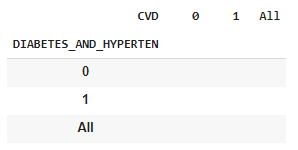

Next, we will want to write code that will make a copy of your count matrix and convert it into a probability matrix by dividing each cell by the total number of patients. Start by writing pseudocode to achieve this <font color='red'>as comments</font> in the code-block below.

In [9]:
# The first step is to identify the total number of patients, which is the total number of rows
numberOfRows = len(df)
print(numberOfRows)


5985


In [10]:
# Create a new dataframe, the new dataframe consists of cells of which value is devided by 5989
df_matrix_of_possibilities=df_matrix_of_count.div(5985)
df_matrix_of_possibilities

CVD,0,1,All
DIABETES_AND_HYPERTEN,,,
0,0.415539,0.453634,0.869173
1,0.063492,0.067335,0.130827
All,0.479031,0.520969,1.000000


Next, write the code to perform each step under their respective comments.

For this, you will need the to use the following Pandas functions:

・`DataFrame.copy()` will create a copy of a DataFrame.

・In a 3x3 matrix, you can access the top-left cell with `DataFrame.iloc[0,0]` and the bottom right cell with `DataFrame.iloc[2,2]`. Here are some examples of accessing cells in-between: `DataFrame.iloc[0,1]`, `DataFrame.iloc[0,2]`,`DataFrame.iloc[1,0]`, `DataFrame.iloc[1,1]`.

・`len(DataFrame)` is the number of columns in a matrix.

・`len(DataFrame.index)` is the number of rows in a matrix.

・Given a count matrix DataFrame with `All` margins named `countMatrix`, the total number of patients/samples/etc. can be calculated with `countMatrix.iloc[len(countMatrix.index) - 1,len(countMatrix) - 1]`.

In [11]:
# At the very begining, use "DataFrame.copy()" function to create a copy of DataFrame.
df_matrix_of_count2=df_matrix_of_count.copy()
# Initialize a new DataFrame with zeros and the same shape as df_matrix_of_count2, the function of this new dataframe is to save the matrix of possibilities
df_matrix_of_possibilities = pd.DataFrame(0, index=df_matrix_of_count2.index, columns=df_matrix_of_count2.columns)
# Get the number of columns in a matrix
numberofcolumns=len(df_matrix_of_count2)
# Get the number of rows in a matrix
numberofrows=len(df_matrix_of_count2.index)
# Iterate over rows at first
for x in range(0, numberofrows):
# Iterate over columns
    for y in range(0, numberofcolumns):
# Do the math to every single cell, and give the value to the variable called "list"
        list=df_matrix_of_count2.iloc[x,y]/5985
# Give the value of the variable - "list" to the empty dataframe
        df_matrix_of_possibilities.iloc[x, y] = list
df_matrix_of_possibilities

CVD,0,1,All
DIABETES_AND_HYPERTEN,,,
0,0.415539,0.453634,0.869173
1,0.063492,0.067335,0.130827
All,0.479031,0.520969,1.000000


In [12]:
# At the very begining, use "DataFrame.copy()" function to create a copy of DataFrame.
df_matrix_of_count2=df_matrix_of_count.copy()
# Initialize a new DataFrame with zeros and the same shape as df_matrix_of_count2, the function of this new dataframe is to save the matrix of possibilities
df_matrix_of_possibilities = pd.DataFrame(0, index=df_matrix_of_count2.index, columns=df_matrix_of_count2.columns)
# Get the number of columns in a matrix
numberofcolumns=len(df_matrix_of_count2)-1
# Get the number of rows in a matrix
numberofrows=len(df_matrix_of_count2.index)-1
# Iterate over rows at first
for x in range(0, numberofrows):
# Iterate over columns
    for y in range(0, numberofcolumns):
# Do the math to every single cell, and give the value to the variable called "list"
        list=df_matrix_of_count2.iloc[x,y]/5989
# Give the value of the variable - "list" to the empty dataframe
        df_matrix_of_possibilities.iloc[x, y] = list
df_matrix_of_possibilities

CVD,0,1,All
DIABETES_AND_HYPERTEN,,,
0,0.415261,0.453331,0
1,0.063450,0.067290,0
All,0.000000,0.000000,0


Finally, convert your code into a function that returns a probability matrix given a count matrix. Then, run your function with a single line of code.

Your function also needs to contain a comment which states what the function does and what its arguments are to facilitate its reuse.

In [13]:
import pandas as pd

def get_probability_matrix(df_matrix_of_count):
    """
    Given a count matrix, returns a probability matrix.

    Parameters:
    - df_count_matrix: DataFrame containing the counts.


    Returns:
    - DataFrame containing the probabilities.
    """
    # Create a copy of the input DataFrame to avoid modifying the original data
    df_matrix_copy = df_matrix_of_count.copy()

    # Calculate the total number of patients
    total = len(df)

    # Initialize an empty DataFrame with zeros and the same shape as df_matrix_copy
    df_probability_matrix = pd.DataFrame(0, index=df_matrix_copy.index, columns=df_matrix_copy.columns)

    # Get the number of columns and rows
    numberofcolumns = len(df_matrix_copy.columns)
    numberofrows = len(df_matrix_copy.index)

    # Iterate over rows and columns
    for x in range(0, numberofrows):
        for y in range(0, numberofcolumns):
            value = df_matrix_copy.iloc[x, y] / total
            df_probability_matrix.iloc[x, y] = value

    return df_probability_matrix

#The input file is df_matrix_of_count, execute the function-get_probability_matrix, return df_prob
df_prob = get_probability_matrix(df_matrix_of_count)
df_prob


CVD,0,1,All
DIABETES_AND_HYPERTEN,,,
0,0.415539,0.453634,0.869173
1,0.063492,0.067335,0.130827
All,0.479031,0.520969,1.000000


Finally, calculate the probability of a cardiovasular disease hopsitalization given a history of both diabetes and hyptertension P(CVD|DIABETES_AND_HYPERTEN). The formula for conditional probability is as follows:

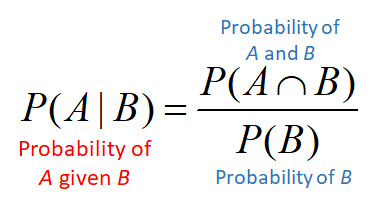

In [17]:
DIABETES_AND_HYPERTEN=df_prob.iloc[1,1]
CVD=df_prob.iloc[1,2]
CVD_DIABETES_AND_HYPERTEN=DIABETES_AND_HYPERTEN/CVD
print(CVD_DIABETES_AND_HYPERTEN)

0.5146871008939975


##**Please ignore the following code-block, this is just for practice**

In [16]:
#let's iterate over the row first, and within each row, iterate over each column
for index, row in df_matrix_of_count.iterrows():
  for col in df_matrix_of_count.columns:
    cell_value = row[col]
    print(cell_value)
# You can see that each cell is iterated

2487
2715
5202
380
403
783
2867
3118
5985
